In [6]:
from tensorflow import keras as k
import matplotlib.pyplot as plt


In [9]:
model = k.models.load_model('model_veoneer.h5')

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 114, 114, 32)      896       
                                                                 
 batch_normalization_21 (Bat  (None, 114, 114, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 57, 57, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_22 (Bat  (None, 57, 57, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 57, 57, 64)        18496     
                                                      

In [4]:
import sounddevice as sd
import math
from time import sleep

In [9]:
def convert_to_probabilities(predicted_values):
    exp_values = [math.exp(val) for val in predicted_values]
    sum_exp_values = sum(exp_values)
    probabilities = [val / sum_exp_values for val in exp_values]
    return probabilities

In [5]:
fs = 44100
duration = 2 # seconds
print ("Recording in 2...")
sleep(1)
print ("Recording in 1...")
sleep(1)
print ("Recording...")
val = sd.rec(frames=fs*duration, samplerate=fs, channels=1)
sd.wait()
print ("Recording...Done")

Recording in 2...
Recording in 1...
Recording...
Recording...Done


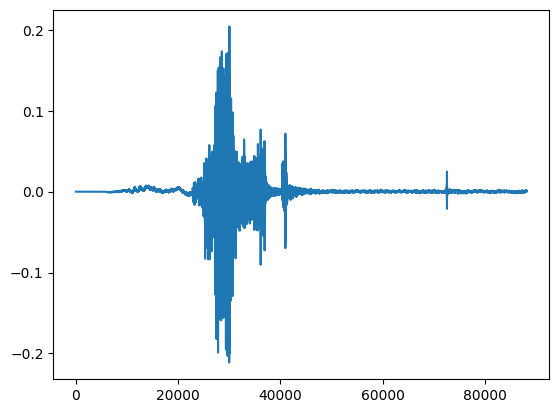

In [7]:
plt.plot(val)

In [11]:
pred = model.predict(val)

ValueError: in user code:

    File "C:\Users\seu21\miniconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\seu21\miniconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\seu21\miniconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\seu21\miniconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\seu21\miniconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\seu21\miniconda3\lib\site-packages\keras\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "conv2d_9" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
      • training=False
      • mask=None
